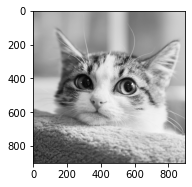

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Chuyển số int sang bin
def int_to_bin(rgb):
    r, g, b = rgb
    return ('{0:08b}'.format(r),
            '{0:08b}'.format(g),
            '{0:08b}'.format(b))

# Chuyển số bin sang int
def bin_to_int(rgb_bin):
     r, g, b = rgb_bin
     return (int(r,2),
             int(g,2),
             int(b,2))

# Nhập ảnh nguồn
source = cv2.imread('./cat.jpeg', cv2.IMREAD_GRAYSCALE)

# Nhập khóa và message
k = 8
# This is secret message from The Fallen
message = 'd'

# Vẽ trước
source_rgb = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(source_rgb)


In [8]:
# Kí tự dấu được tối đa - cần sửa lại vì chưa chính xác
def verify(source, message):
    pixels = source.shape[0] * source.shape[1]
    block_size = k*k
    max_stored = int(source.shape[0] / k) * int(source.shape[1] / k)
    print('Tổng số pixel:',pixels,'\nBlock size:',block_size,'\nKí tự tối đa:',int(max_stored))
    print('Message:',message,'\nTổng số kí tự message:',len(message))
    ok = len(message) <= max_stored
    return {
        'pixels': pixels,
        'block_size': block_size,
        'max_stored': max_stored,
        'ok': ok
    }

In [9]:
# first_px = source_rgb[0][0]
# first_px_bin = int_to_bin(first_px)
# print('Kiểm tra 2 function chuyển đổi:')
# print(first_px,'====>',first_px_bin)
# print(first_px_bin,'====>',bin_to_int(first_px_bin))

In [10]:
def string_to_bin(message):
    bin_words = []
    for c in message:
        bin_words.append('{0:08b}'.format(ord(c)))
    return bin_words


In [35]:
def hide(source, message):
    info = verify(source,message)
    msg_bin = string_to_bin(message)
    print(info)
    print('msg_bin:',msg_bin)

    # Ví dụ tách block và chuyển phần tử block thành nhị phân
    block = source[0:8,0]
    arr = np.array(['{0:08b}'.format(int(i)) for i in block]).reshape(-1,1)
    print(arr)
    
    # for y in range(0, source.shape[0], k):
    #     for x in range(0, source.shape[1], k):
    #         block = source[y:y+k, x:x+k]
    #         print(block)


hide(source, message)

Tổng số pixel: 810000 
Block size: 64 
Kí tự tối đa: 12544
Message: d 
Tổng số kí tự message: 1
{'pixels': 810000, 'block_size': 64, 'max_stored': 12544, 'ok': True}
msg_bin: ['01100100']
[['10001111']
 ['10001111']
 ['10010000']
 ['10010000']
 ['10010000']
 ['10010010']
 ['10010011']
 ['10010010']]
